## Извлечение признаков

In [1]:
import json
import pandas as pd

### Изображения

In [2]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from scipy.misc import face
import numpy as np

Using TensorFlow backend.


In [3]:
resnet_settings = {'include_top': False, 'weights': 'imagenet'}
resnet = ResNet50(**resnet_settings)

In [4]:
from PIL import Image
img = image.array_to_img(face())

In [5]:
img = img.resize((224, 224))

In [6]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [7]:
features = resnet.predict(x)

In [8]:
features

array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.11169195, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          1.0361919 , 0.        ],
         [0.        , 1.2709417 , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.20009959, 0. 

### Текст на изображении

In [13]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO

In [38]:
img = 'http://ohscurrent.org/wp-content/uploads/2015/09/domus-01-google.jpg'

In [39]:
img = requests.get(img)
img = Image.open(BytesIO(img.content))
text = pytesseract.image_to_string(img)

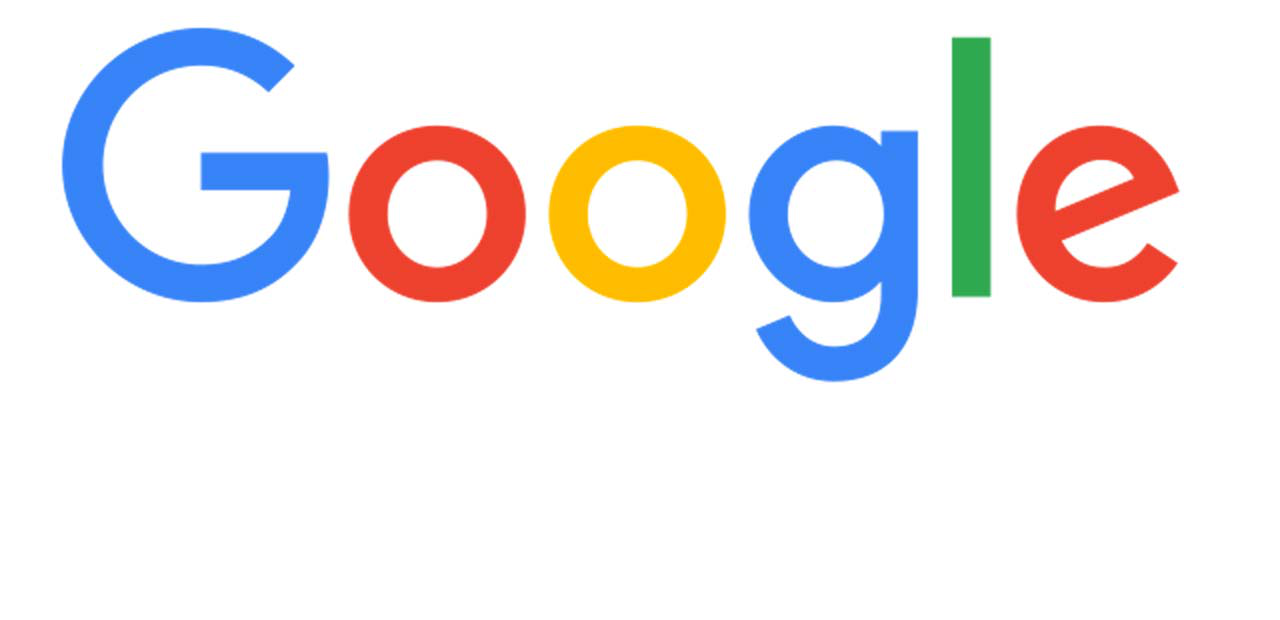

In [44]:
img

In [41]:
text

'Google'

In [45]:
img_apartm = requests.get('https://photos.renthop.com/2/8393298_6acaf11f030217d05f3a5604b9a2f70f.jpg')
img_apartm = Image.open(BytesIO(img_apartm.content))
text = pytesseract.image_to_string(img_apartm)

In [46]:
text

''

Еще один случай, когда нейросети не помогут – извлечение признаков из метаинфорации. 

### Геоданные

Если данных много, легко упереться в лимиты внешних API. Да и получать информацию по HTTP – далеко не всегда оптимальное по скорости решение. Поэтому стоит иметь в виду возможность использования локальной версии OpenStreetMap.

Если данных немного, времени хватает, а желания извлекать наворченные признаки нет, то можно не заморачиваться с OpenStreetMap и воспользоваться reverse_geocoder:

In [139]:
with open('../data/train.json', 'r') as raw_data:
    data = json.load(raw_data)
    df = pd.DataFrame(data)

In [59]:
import reverse_geocoder as revgc

In [63]:
revgc.search((df.latitude, df.longitude))

ValueError: too many values to unpack (expected 2)

### Дата и время

Начнем с дней недели – их легко превратить в 7 dummy переменных при помощи one-hot кодирования. Кроме этого, полезно выделить отдельный признак для выходных.

In [83]:
df['created'] = pd.to_datetime(df['created']) 

In [84]:
df['dow'] = df['created'].apply(lambda x: x.date().weekday())
df['is_weekend'] = df['created'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)

In [86]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,dow,is_weekend
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium,4,0
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low,6,1
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,high,6,1
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low,0,0
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,low,3,0


Проекция на окружность с последующим использованием двух координат сохраняет информацию о близости часов

In [89]:
def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period
    return np.cos(value), np.sin(value)

Такое преобразование сохраняет дистанцию между точками, что важно для некоторых алгоритмов, основанных на расстоянии (kNN, SVM, k-means...)

In [92]:
from scipy.spatial import distance
from scipy.spatial.distance import euclidean
euclidean(make_harmonic_features(23), make_harmonic_features(1))

0.5176380902050423

In [93]:
euclidean(make_harmonic_features(9), make_harmonic_features(11))

0.5176380902050414

In [94]:
euclidean(make_harmonic_features(9), make_harmonic_features(21))

2.0

### Временные ряды

Библиотека для автоматической генерации признаков из временных рядов: https://github.com/blue-yonder/tsfresh

## Преобразования признаков

### Нормализация и изменение распределения

Самая простая трансформация – это **Standart Scaling** 

In [99]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import beta
from scipy.stats import shapiro

In [102]:
data = beta(1, 10).rvs(1000).reshape(-1, 1)

In [103]:
shapiro(data)

(0.8618316650390625, 9.432152226523452e-29)

In [104]:
shapiro(StandardScaler().fit_transform(data))

(0.8618314862251282, 9.431851299969642e-29)

Другой достаточно популярный вариант – **MinMax Scaling**, который переносит все точки на заданный отрезок (обычно (0, 1)).

$X_{norm} = (X - X_{min}) / (X_{max} - X_{min})$

In [105]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler().fit_transform(data)

array([[9.60939754e-02],
       [2.37772040e-01],
       [7.89409498e-01],
       [1.46533615e-01],
       [9.92128066e-01],
       [1.63348476e-01],
       [2.38294781e-01],
       [2.90175322e-02],
       [4.07643121e-02],
       [2.21382846e-01],
       [2.70649392e-02],
       [9.14922388e-02],
       [2.97885993e-02],
       [1.08966933e-02],
       [6.54359700e-02],
       [1.18838340e-01],
       [1.81839859e-01],
       [5.17396422e-02],
       [5.26617612e-01],
       [5.19387862e-01],
       [7.70668912e-02],
       [1.64090212e-01],
       [5.51889447e-01],
       [4.67881074e-02],
       [1.80792705e-01],
       [6.63748525e-02],
       [1.44423595e-01],
       [1.29011970e-01],
       [1.01051653e-02],
       [1.05186420e-01],
       [3.56888868e-01],
       [1.78486147e-01],
       [7.65641921e-01],
       [5.03452583e-01],
       [2.35059417e-01],
       [1.45129481e-01],
       [2.58093696e-01],
       [5.83729645e-01],
       [1.19430880e-01],
       [1.96208379e-01],


In [107]:
(data - data.min()) / (data.max() - data.min())

array([[9.60939754e-02],
       [2.37772040e-01],
       [7.89409498e-01],
       [1.46533615e-01],
       [9.92128066e-01],
       [1.63348476e-01],
       [2.38294781e-01],
       [2.90175322e-02],
       [4.07643121e-02],
       [2.21382846e-01],
       [2.70649392e-02],
       [9.14922388e-02],
       [2.97885993e-02],
       [1.08966933e-02],
       [6.54359700e-02],
       [1.18838340e-01],
       [1.81839859e-01],
       [5.17396422e-02],
       [5.26617612e-01],
       [5.19387862e-01],
       [7.70668912e-02],
       [1.64090212e-01],
       [5.51889447e-01],
       [4.67881074e-02],
       [1.80792705e-01],
       [6.63748525e-02],
       [1.44423595e-01],
       [1.29011970e-01],
       [1.01051653e-02],
       [1.05186420e-01],
       [3.56888868e-01],
       [1.78486147e-01],
       [7.65641921e-01],
       [5.03452583e-01],
       [2.35059417e-01],
       [1.45129481e-01],
       [2.58093696e-01],
       [5.83729645e-01],
       [1.19430880e-01],
       [1.96208379e-01],


StandartScaling и MinMax Scaling имеют похожие области применимости и часто сколько-нибудь взаимозаменимы. Впрочем, если алгоритм предполагает вычисление расстояний между точками или векторами, выбор по умолчанию – StandartScaling. Зато MinMax Scaling полезен для визуализации, чтобы перенести признаки на отрезок (0, 255).



Если мы предполагаем, что некоторые данные не распределены нормально, зато описываются логнормальным распределением, их можно легко привести к честному нормальному распределению:



In [109]:
from scipy.stats import lognorm

In [110]:
data = lognorm(s=1).rvs(1000)
shapiro(data)

(0.6000187397003174, 5.3809861030072976e-43)

In [111]:
shapiro(np.log(data))

(0.9989109635353088, 0.8238965272903442)

Для проверки на нормальность будем использовать менее формальный метод – **Q-Q график**. Для нормального распределения он будет выглядеть как ровная диагональная линия, и визуальные отклонения интуитивно понятны.

In [114]:
import statsmodels.api as sm

In [117]:
# возьмем признак price из датасета Renthop и пофильтруем руками совсем экстремальные значения для наглядности
price = df.price[(df.price <= 20000) & (df.price > 500)]
price_log = np.log(price)

In [118]:
price.values

array([3000, 5465, 2850, ..., 2595, 3350, 2200])

In [122]:
price.values.reshape(-1, 1)

array([[3000],
       [5465],
       [2850],
       ...,
       [2595],
       [3350],
       [2200]])

In [126]:
price_mm = MinMaxScaler().fit_transform(price.values.reshape(-1, 1).astype(np.float64)).flatten()

In [127]:
price_z = StandardScaler().fit_transform(price.values.reshape(-1, 1).astype(np.float64)).flatten()

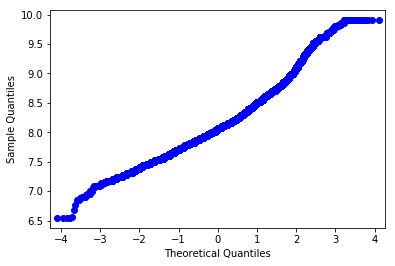

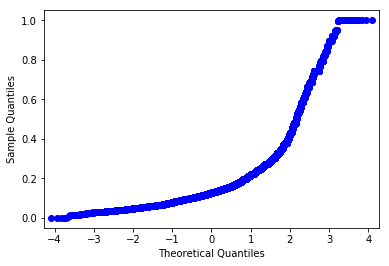

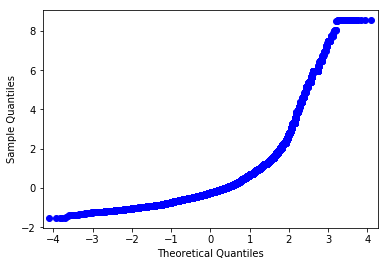

In [128]:
sm.qqplot(price_log, loc=price_log.mean(), scale=price_log.std()).savefig('qq_price_log.png')
sm.qqplot(price_mm, loc=price_mm.mean(), scale=price_mm.std()).savefig('qq_price_mm.png')
sm.qqplot(price_z, loc=price_z.mean(), scale=price_z.std()).savefig('qq_price_z.png')

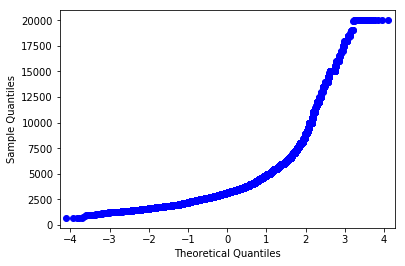

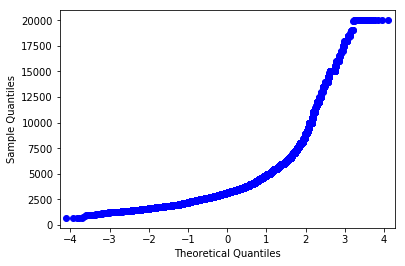

In [130]:
sm.qqplot(price, loc=price.mean(), scale=price.std())

Давайте посмотрим, могут ли преобразования как-то помочь реальной модели.

Автор сделал небольшой скрипт, который читает данные соревнования Renthop, выбирает некоторые признаки (остальные по-диктаторски выброшены для простоты), и возвращает нам более или менее готовые данные для демонстрации.

In [142]:
import numpy as np
import pandas as pd
import json
from sklearn.base import TransformerMixin

EPSILON = 1e-5


class FeatureEngineer(TransformerMixin):

    def apply(self, df, k, condition):
        df[k] = df['features'].apply(condition)
        df[k] = df[k].astype(np.int8)

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None):
        df = X.copy()

        df.features = df.features.apply(lambda x: ' '.join([y.replace(' ', '_') for y in x]))
        df.features = df.features.apply(lambda x: x.lower())
        df.features = df.features.apply(lambda x: x.replace('-', '_'))

        for k, condition in (('dishwasher', lambda x: 'dishwasher' in x),
                             ('doorman', lambda x: 'doorman' in x or 'concierge' in x),
                             ('pets', lambda x: "pets" in x or "pet" in x or "dog" in x or "cats" in x and "no_pets" not in x),
                             ('air_conditioning', lambda x: 'air_conditioning' in x or 'central' in x),
                             ('parking', lambda x: 'parking' in x),
                             ('balcony', lambda x: 'balcony' in x or 'deck' in x or 'terrace' in x or 'patio' in x),
                             ('bike', lambda x: 'bike' in x),
                             ('storage', lambda x: 'storage' in x),
                             ('outdoor', lambda x: 'outdoor' in x or 'courtyard' in x or 'garden' in x),
                             ('roof', lambda x: 'roof' in x),
                             ('gym', lambda x: 'gym' in x or 'fitness' in x),
                             ('pool', lambda x: 'pool' in x),
                             ('backyard', lambda x: 'backyard' in x),
                             ('laundry', lambda x: 'laundry' in x),
                             ('hardwood_floors', lambda x: 'hardwood_floors' in x),
                             ('new_construction', lambda x: 'new_construction' in x),
                             ('dryer', lambda x: 'dryer' in x),
                             ('elevator', lambda x: 'elevator' in x),
                             ('garage', lambda x: 'garage' in x),
                             ('pre_war', lambda x: 'pre_war' in x or 'prewar' in x),
                             ('post_war', lambda x: 'post_war' in x or 'postwar' in x),
                             ('no_fee', lambda x: 'no_fee' in x),
                             ('low_fee', lambda x: 'reduced_fee' in x or 'low_fee' in x),
                             ('fire', lambda x: 'fireplace' in x),
                             ('private', lambda x: 'private' in x),
                             ('wheelchair', lambda x: 'wheelchair' in x),
                             ('internet', lambda x: 'wifi' in x or 'wi_fi' in x or 'internet' in x),
                             ('yoga', lambda x: 'yoga' in x),
                             ('furnished', lambda x: 'furnished' in x),
                             ('multi_level', lambda x: 'multi_level' in x),
                             ('exclusive', lambda x: 'exclusive' in x),
                             ('high_ceil', lambda x: 'high_ceil' in x),
                             ('green', lambda x: 'green_b' in x),
                             ('stainless', lambda x: 'stainless_' in x),
                             ('simplex', lambda x: 'simplex' in x),
                             ('public', lambda x: 'public' in x),
                             ):
            self.apply(df, k, condition)

        df['bathrooms'] = df['bathrooms'].apply(lambda x: x if x < 5 else 5)
        df['bedrooms'] = df['bedrooms'].apply(lambda x: x if x < 5 else 5)
        df["num_photos"] = df["photos"].apply(len)
        df["num_features"] = df["features"].apply(len)
        created = pd.to_datetime(df.pop("created"))
        df["listing_age"] = (pd.to_datetime('today') - created).apply(lambda x: x.days)
        df["room_dif"] = df["bedrooms"] - df["bathrooms"]
        df["room_sum"] = df["bedrooms"] + df["bathrooms"]
        df["price_per_room"] = df["price"] / df["room_sum"].apply(lambda x: max(x, .5))
        df["bedrooms_share"] = df["bedrooms"] / df["room_sum"].apply(lambda x: max(x, .5))
        df['price'] = df['price'].apply(lambda x: np.log(x + EPSILON))

        key_types = df.dtypes.to_dict()
        for k in key_types:
            if key_types[k].name not in ('int64', 'float64', 'int8'):
                df.pop(k)

        for k in ('latitude', 'longitude', 'listing_id'):
            df.pop(k)
        return df


def encode(x):
    if x == 'low':
        return 0
    elif x == 'medium':
        return 1
    elif x == 'high':
        return 2


def get_data():
    with open('../data/train.json', 'r') as raw_data:
        data = json.load(raw_data)

    df = pd.DataFrame(data)
    target = df.pop('interest_level').apply(encode)

    df = FeatureEngineer().fit_transform(df)
    return df, target

In [143]:
x_data, y_data = get_data()
x_data.head(5)

,bathrooms,bedrooms,price,dishwasher,doorman,pets,air_conditioning,parking,balcony,bike,...,stainless,simplex,public,num_photos,num_features,listing_age,room_dif,room_sum,price_per_room,bedrooms_share
10,1.5,3,8.006368,0,0,0,0,0,0,0,...,0,0,0,5,0,761,1.5,4.5,666.666667,0.666667
10000,1.0,2,8.606119,0,1,1,0,0,0,0,...,0,0,0,11,57,773,1.0,3.0,1821.666667,0.666667
100004,1.0,1,7.955074,1,0,1,0,0,0,0,...,0,0,0,8,72,829,0.0,2.0,1425.000000,0.500000
100007,1.0,1,8.094073,0,0,0,0,0,0,0,...,0,0,0,3,22,828,0.0,2.0,1637.500000,0.500000
100013,1.0,4,8.116716,0,0,0,0,0,0,0,...,0,0,0,3,7,818,3.0,5.0,670.000000,0.800000


In [144]:
x_data = x_data.values

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [147]:
cross_val_score(LogisticRegression(), x_data, y_data, scoring='neg_log_loss').mean()

/Users/minaevaolga/Projects/ODS/venv/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


-0.6847244755342126

In [148]:
from sklearn.preprocessing import StandardScaler
cross_val_score(LogisticRegression(), StandardScaler().fit_transform(x_data), y_data, scoring='neg_log_loss').mean()

/Users/minaevaolga/Projects/ODS/venv/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


-0.6698493413900328

In [ ]:
# стало лучше с этой нормализацией

In [149]:
from sklearn.preprocessing import MinMaxScaler
cross_val_score(LogisticRegression(), MinMaxScaler().fit_transform(x_data), y_data, scoring='neg_log_loss').mean()

-0.6852260349462759

### Взаимодействия

Если предыдущие преобразования диктовались скорее математикой, то этот пункт снова обоснован природой данных; его можно отнести как к трансформациям, так и к созданию новых признаков.

Снова обратимся к задаче Two Sigma Connect: Rental Listing Inquires. Среди признаков в этой задаче есть количество комнат и стоимость аренды. Житейская логика подсказывает, что стоимость в пересчете на одну комнату более показательна, чем общая стоимость – значит, можно попробовать выделить такой признак.



In [151]:
rooms = df["bedrooms"].apply(lambda x: max(x, .5)) # избегаем деления на ноль; .5 выбран более или менее произвольно

In [152]:
df['price_per_bedroom'] = df['price'] / rooms

Необязательно руководствоваться жизненной логикой. Если признаков не очень много, вполне можно сгенерировать все возможные взаимодействия и потом отсеять лишние, используя одну из техник, описанных в следующем разделе. Кроме того, не все взаимодействия между признаками должны иметь хоть какой-то физический смысл: например, (часто используемые для линейных моделей) полиномиальные признаки трактовать практически невозможно.

### Заполнение пропусков

Обе ключевые для анализа данных python библиотеки предоставляют простые как валенок решения: **pandas.DataFrame.fillna** и **sklearn.preprocessing.Imputer**.


Готовые библиотечные решения не прячут никакой магии за фасадом. Подходы к обработке отсутствующих значений напрашиваются на уровне здравого смысла:


- закодировать отдельным пустым значением типа "n/a" (для категориальных переменных);
- использовать наиболее вероятное значение признака (среднее или медиану для вещественных переменных, самое частое для категориальных);
- наоборот, закодировать каким-то невероятным значением (хорошо заходит для моделей, основанных на деревьях решений, т.к. позволяет сделать разделение на пропущенные и непропущенные значения);
- для упорядоченных данных (например, временных рядов) можно брать соседнее значение – следующее или предыдущее.

Удобство использования библиотечных решений иногда подсказывает воткнуть что-то вроде **df = df.fillna(0)** и не париться о пропусках. Но это не самое разумное решение: большая часть времени обычно уходит не на построение модели, а на подготовку данных; бездумное неявное заполнение пропусков может спрятать баг в обработке и испортить модель.

### Выбор признаков (Feature selection)

Почему надо?
- чем больше данных, тем выше вычислительная сложность;
- некоторые алгоритмы принимают шум (неинформативные признаки) за сигнал, переобучаясь.



#### Статистические подходы

Самый очевидный кандидат на отстрел – признак, у которого значение неизменно, т.е. не содержит вообще никакой информации. Если немного отойти от этого вырожденного случая, резонно предположить, что низковариативные признаки скорее хуже, чем высоковариативные. Так можно придти к идее отсекать признаки, **дисперсия которых ниже определенной границы**.

In [155]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification

In [156]:
x_data_generated, y_data_generated = make_classification()
x_data_generated.shape

(100, 20)

In [157]:
VarianceThreshold(.7).fit_transform(x_data_generated).shape

(100, 20)

In [158]:
VarianceThreshold(.8).fit_transform(x_data_generated).shape

(100, 19)

In [159]:
VarianceThreshold(.9).fit_transform(x_data_generated).shape

(100, 17)

In [160]:
VarianceThreshold(1).fit_transform(x_data_generated).shape

(100, 15)

Есть и другие способы, также основанные на __[классической статистике](http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)__.

